In [8]:
import numpy as np
import random
import pandas as pd
from sklearn.datasets import make_classification

In [9]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [10]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.551604,1.389414,1.825365,2.007343,-0.940413,0
1,-1.807744,1.961374,0.457766,1.352116,-0.458412,0
2,0.371197,4.130708,3.426651,3.826238,-1.449581,0
3,-4.070882,0.513663,0.075477,0.237475,-1.367030,0
4,-0.603815,-0.902305,2.939074,1.236296,-1.393441,1


In [11]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [12]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [13]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [14]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\rajab\AppData\Local\Temp\ipykernel_8760\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\rajab\AppData\Local\Temp\ipykernel_8760\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\rajab\AppData\Local\Temp\ipykernel_8760\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [17]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')


In [18]:
df3

,col1,col2,target
87,0.197555,0.842957,0
22,-0.316245,0.694791,0
44,-0.584268,-0.594732,1
64,-0.921642,1.375024,0
82,-0.516071,-1.561181,1
15,-2.212302,0.232741,0
34,-0.956441,-2.942402,1
67,-3.171274,-0.746992,1
89,-4.258407,0.273031,0
61,-1.235627,-0.990639,1


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [20]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [21]:
from sklearn.tree import plot_tree

[Text(0.39285714285714285, 0.9, 'x[0] <= -0.096\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.14285714285714285, 0.7, 'x[1] <= 0.204\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.26785714285714285, 0.8, 'True  '),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.21428571428571427, 0.5, 'x[0] <= -1.992\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6428571428571429, 0.7, 'x[1] <= -2.296\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.5178571428571429, 0.8, '  False'),
 Text(0.5, 0.5, 'x[0] <= 1.466\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.42857142857142855, 0.3, 'x[0] <= 0.067\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.35714285714285715, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),


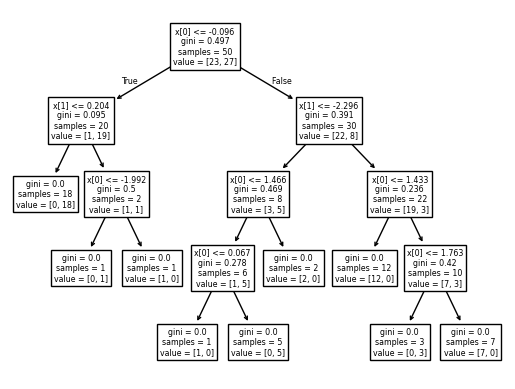

In [22]:
plot_tree(clf1)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.443\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.25, 0.5, 'x[1] <= -1.194\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.75, 0.5, 'x[1] <= 1.457\ngini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

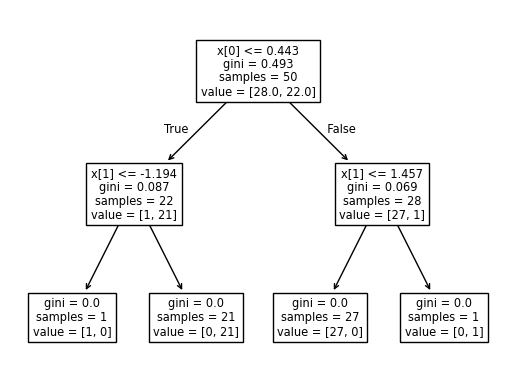

In [23]:
plot_tree(clf2)

[Text(0.7777777777777778, 0.9166666666666666, 'x[1] <= 0.472\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.6666666666666666, 0.75, 'x[0] <= -2.063\ngini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.7222222222222222, 0.8333333333333333, 'True  '),
 Text(0.5555555555555556, 0.5833333333333334, 'x[1] <= -0.257\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= -1.235\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2222222222222222, 0.25, 'x[0] <= -3.058\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.4166666666666667, 'x[0] <= -3.853\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6666666666666666, 0.25, 'x[0] <= -4.108\ngini = 0.5\n

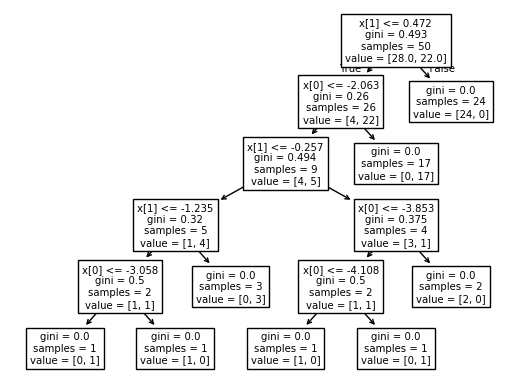

In [24]:
plot_tree(clf3)

In [25]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\rajab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\rajab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [145]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [ ]:
df.sample(14,replace=True)

,humidity,wind,play
0,0,1,0
0,0,1,0
0,0,1,0
10,1,0,1
13,0,0,0
4,1,1,1
7,0,1,0
6,1,0,1
4,1,1,1
3,0,1,1
